<a href="https://colab.research.google.com/github/Datacather/Hotel-Booking-Analysis/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
# Importing all import python libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
hotel_booking = pd.read_csv("/content/Hotel Bookings (2).csv")

In [ ]:
hotel_booking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hotel_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
hotel_booking.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


we see in this there are 32 columns in the hotel booking and some columns like 'children', 'company', 'country' and 'agent'have null values


In [ ]:
#creating a copy of hotel booking
df1=hotel_booking.copy()

first of all we will try to understand the meaning of all columns of the dataframr.\for this we will see the unique values attained by each column whose meaning we are unable to understad

In [ ]:
df1['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
df1['is_canceled'].unique()

array([0, 1])

In [ ]:
df1['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
df1['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [ ]:
df1['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [ ]:
df1['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

cleaning data 

while cleaning the data they have to perform below steps
1)Remove the duplicate rows \3)Handling  missing values.3)convert columns to appropriate datatypes.4)Adding importantcolumns

1)Removing duplicate rows if any

In [ ]:
df1[df1.duplicated()].shape

(31994, 32)

In [ ]:
#Dropping duplicate values
df1. drop_duplicates(inplace=True)


In [ ]:
df1.shape

(87396, 32)

2)handling  missing values

In [ ]:
#columns having missing values.
df1.isnull().sum().sort_values(ascending=False)[:6]

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
assigned_room_type        0
dtype: int64

In [ ]:
df1[['company','agent']]=df1[['company','agent']].fillna(0)

In [ ]:
df1['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [ ]:
df1['children'].fillna(df1['children'].mean(),inplace=True)

in this column children has 0 as value which means 0 children were present in group of customers who made that transaction data.\so,'nan' values are the missing values due to error of recording data.\\we will replace the null values under this column with mean value of children

In [ ]:
df1['country'].fillna('others',inplace=True)

In [ ]:
#checking if all null values are removed
df1.isnull().sum().sort_values(ascending=False)[:6]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
adr                            0
dtype: int64

they have some rows with total number of adults,childrens or babies equal to zero. so we will remove such rows.

In [ ]:
df1[df1['adults']+df1['babies']+df1['children']==0].shape

(166, 32)

In [ ]:
df1.drop(df1[df1['adults']+df1['babies']+df1['children']==0].index,inplace=True)

3)converting columns to appropriate datatypes.

In [ ]:
#converting datatype 0f columns 'childrens', 'company', and 'agent' from float to int

In [ ]:
df1[['children','company','agent']]=df1[['children','company','agent']].astype('int64')

In [ ]:
#changing datatype of column 'reservation_status_date' to data_type

In [ ]:
df1['reservation_status_date'] = pd.to_datetime(df1['reservation_status_date'],format='%Y-%m-%d')

4)Adding important columns.


In [ ]:
#adding total staying days in hotels
df1['total_stay']=df1['stays_in_week_nights']+df1['stays_in_weekend_nights']

In [ ]:
#adding total people num as column, i.e. total people num=num of adults+babies+children
df1['total_people']=df1['adults']+df1['babies']+df1['children']

we are adding this column so that we can analyse the length at hotels

EDA

lets first find the correlation between the numerical data.\\
since ,columns like 'is_cancelled', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of month', 'is_repeated_guest', 'company', 'agent', are categorical data having numerical type. so w wont need to check them for correlation.\\
also,ew have added total_stay and total_people columns. so, wecan remove  adults, children, babies, stay_in_weekend_nights, stay_in_week_nights columns

In [ ]:
num_df1 = df1[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_people']]


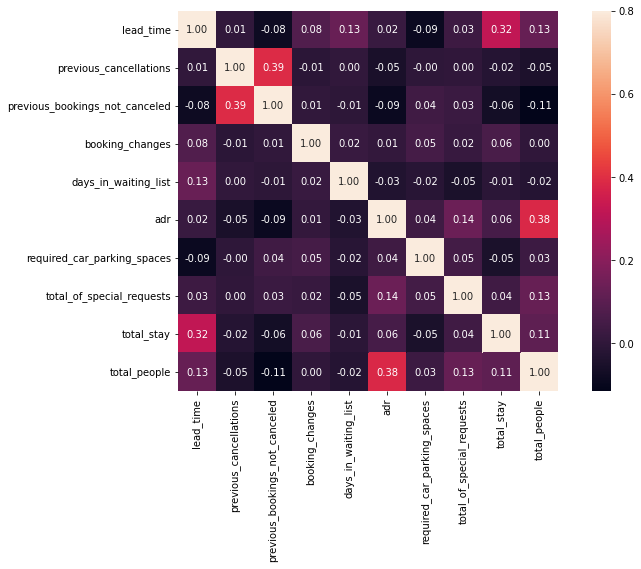

In [ ]:
#correlation matrix
corrmat=num_df1.corr()
f, ax = plt.subplots(figsize=(12,7))
sns.heatmap(corrmat,annot=True,fmt='.2f',annot_kws={'size':10}, vmax=.8, square=True);
  

1)total stay length and lead time have slightly correlation. this may means that for longer hotel stays people generally plan little before the actual arrival.

2)adr is slightly correlated with total_people means more revenue, therefore more adr.

lets see does length of stay affect the adr.

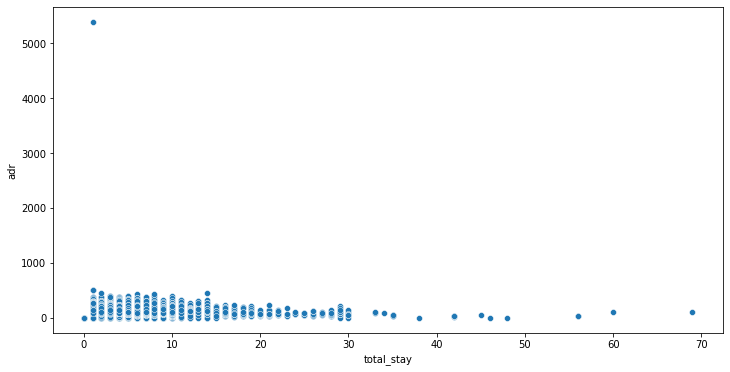

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df1)
plt.show( )

we notice that there is an outlier in adr, so we will remove that for better scatter plot

In [ ]:
df1.drop(df1[df1['adr'] > 5000].index,inplace=True)

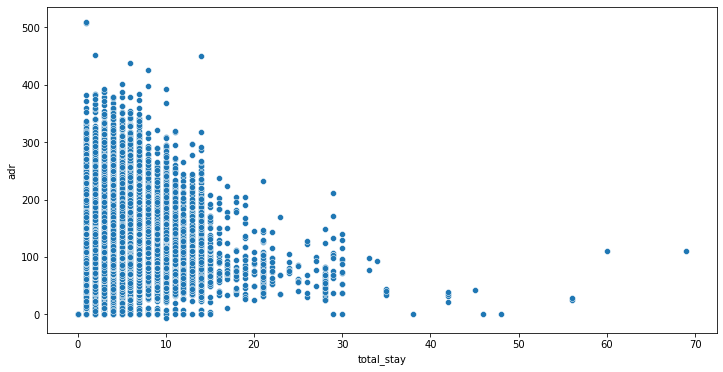

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(y ='adr', x ='total_stay',data=df1)
plt.show()

from the satter plot we see that as length of total_stay increases the adr decreases. this means for longer  stay, the better deal for customer can be finalised.

UNIVARIATE ANALYSIS

Q1)Which meal is most preffered meal of customers?

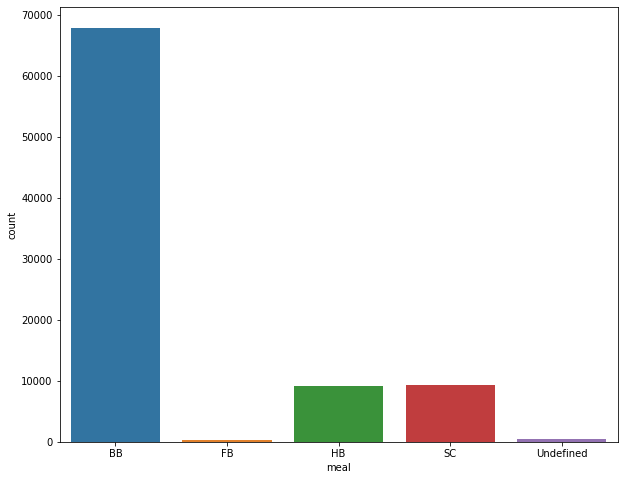

In [ ]:
plt.figure(figsize=(10,8))

sns.countplot(x=df1['meal'])
plt.show()

most preferred meal type is BB(bed and breakfast)

HOTEL WISE ANALYSIS

Q2)what is the percentage of bookings in each hotel?

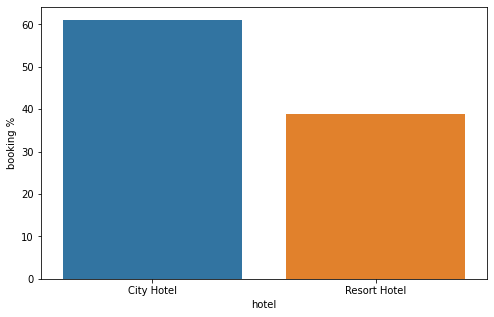

In [ ]:
grouped_by_hotel=df1.groupby('hotel')
d1=pd.DataFrame((grouped_by_hotel.size()/df1.shape[0])*100).reset_index().rename(columns={0:'booking %'})   #calculating percentage
plt.figure(figsize=(8,5))
sns.barplot(x=d1['hotel'], y=d1['booking %'])
plt.show()

around 60% booking are for city hotel and 40% bookings are for resort hotel.


Q3)what is preferred stay length in each hotel?

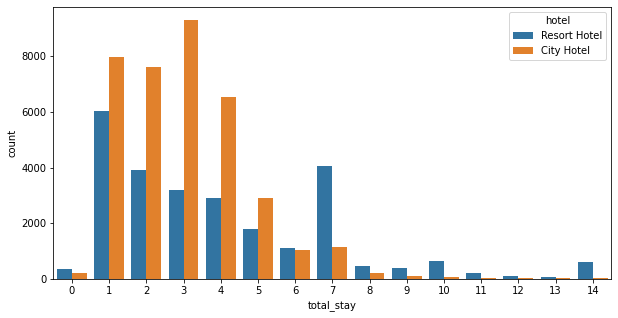

In [ ]:
not_canceled=df1[df1['is_canceled']==0]
s1=not_canceled[not_canceled['total_stay']<15]
plt.figure(figsize=(10,5))
sns.countplot(x=s1['total_stay'],hue=s1['hotel'])
plt.show()

most common stay length is less than 4 days and generally people prefer city hotel for short stay, but for long stays,resort hotel is preferred.


Q4)which room type is in most demand and which room type generatest highest adr?

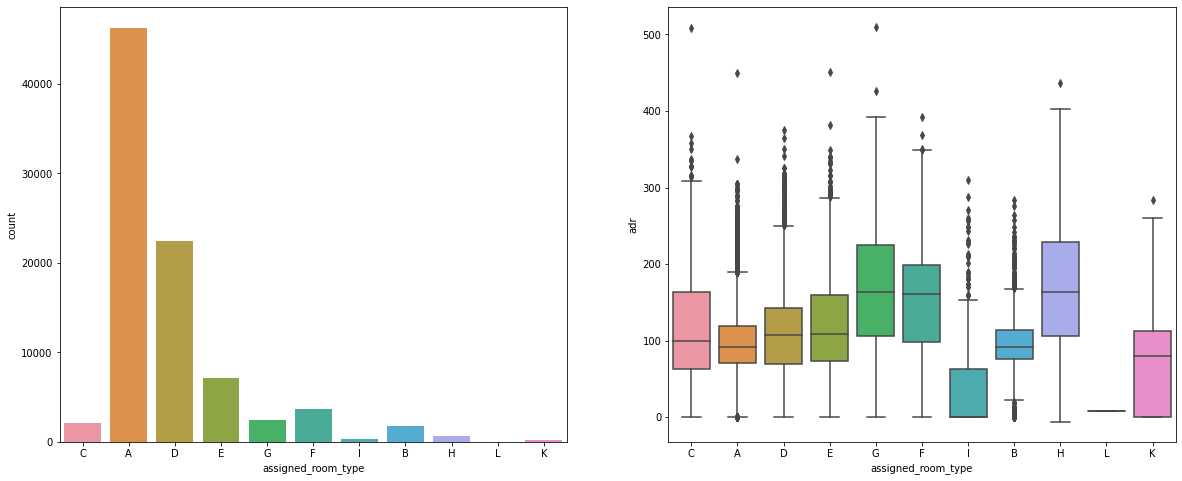

In [ ]:
fig, axes=plt.subplots(1,2, figsize=(20,8))
grp_by_room=df1.groupby('assigned_room_type')
d1['num_of_booking']=grp_by_room.size()

sns.countplot(ax=axes[0], x=df1['assigned_room_type'])
sns.boxplot(ax=axes[1],x=df1['assigned_room_type'], y=df1['adr'])
plt.show()


most demanded room type is A, but better adr rooms are of type H, G and C also. hoteels should increase the no. of room types A andH to maximise revenue.


Q5)which ditribution channel gives better generating deals for hotels?

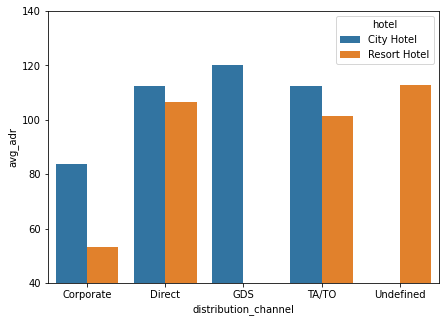

In [ ]:
group_by_dc_hotel = df1.groupby(['distribution_channel', 'hotel'])
d5 = pd.DataFrame(round((group_by_dc_hotel['adr']).agg(np.mean),2)).reset_index().rename(columns = {'adr': 'avg_adr'})
plt.figure(figsize = (7,5))
sns.barplot(x = d5['distribution_channel'], y = d5['avg_adr'], hue = d5['hotel'])
plt.ylim(40,140)
plt.show()

GDS channel brings higher revenue generating deals for City hotel, in contrast to that most bookings come via TA/TO. City Hotel can work to increase outreach on GDS channels to get more higher revenue generating deals.

Resort hotel has more revnue generating deals by direct and TA/TO channel. Resort Hotel need to increase outreach on GDS channel to increase revenue.



Q6)Which significant distribution channel has highest cancellation percentage?



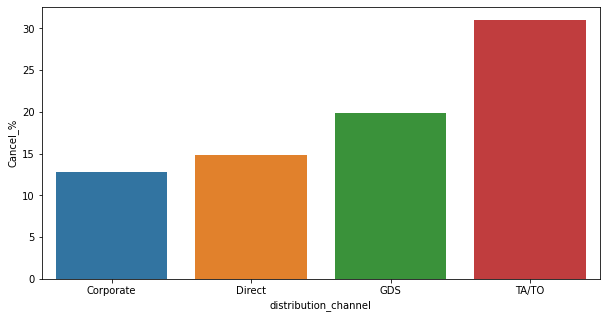

In [ ]:
group_by_dc=df1.groupby('distribution_channel')
d1 = pd.DataFrame((group_by_dc['is_canceled'].sum()/group_by_dc.size())*100).drop(index = 'Undefined').rename(columns = {0: 'Cancel_%'})
plt.figure(figsize = (10,5))
sns.barplot(x = d1.index, y = d1['Cancel_%'])
plt.show()

While booking via TA/TO one may have to wait a little longer to confirm booking of rooms.



SUMMERY

I conclude and observe thatin this hotel booking are as follows.

1)In this hotels there are 66% is City Hotel and 34% is Resort Hotel

2)Most of the market_segments customers are used online TA and offline TA/TO.

3)In this booking 72% guests book the rooms type A but only 62% is actually assigned the same room.

4)In this they are only 3% guests are repeated.

5)In this booking 36% reservation are canceled by guests

6)Only 88% guests have reserved and assigned same room.

7)They have 82% distribution_channel in TA/TO.

8)37% booking has been canceled



9) From reservation_status it is clear that though City Hotel is 64% but Resort Hotel has more number of guests and City Hotel has more number of Cancellation as compare to Resort Hotel

10) From market_segment and distribution_channel we can observe that City Hotel is more into 'Online TA' and Resort Hotel is more into 'Direct' segment.

11) From meal we can observe that City Hotel provide 'BB' and Resort Hotel provide 'HB'.

12) City Hotel is more non-refund as compare to Resort Hotel

13) Most of the guests are from PRT and they happen to choose Resort Hotel more than City Hotel

14) It is observed arrival_date_week_number and arrival_date_year are 54% negative correlated.

15) Company and agent are positive correlated by 35%.

16) adr and children are positive correlated by 32%

17)Guest using 'Complementary' segment are the one who is repeated followed by 'Corporate'.

18)Guest with babies and children likely to make special request as comapre to guest without babies or children.

19)'Undefined' and 'Group' are the top segemnt where guest usually cancel the booking foolowed by 'Online TA'.

20)Colusion have been made that customer type 'Group' has more number of guests i.e 89% and 'Transient' has more number of canceled guests 39.5%.

21)We have concluded that having different room then desired room is not the major cause of cancelation.
 